In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path('/home/kushaj/Desktop/Github/Final_Techgig/data/Pose/')
path.ls()

[PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Pose/2'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Pose/0'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Pose/1'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Pose/models')]

In [3]:
data = (ImageList.from_folder(path)
                 .split_by_rand_pct()
                 .label_from_folder()
                 .transform(get_transforms(max_rotate=3.), size=(125,125))
                 .databunch(num_workers=8)
                 .normalize(imagenet_stats))

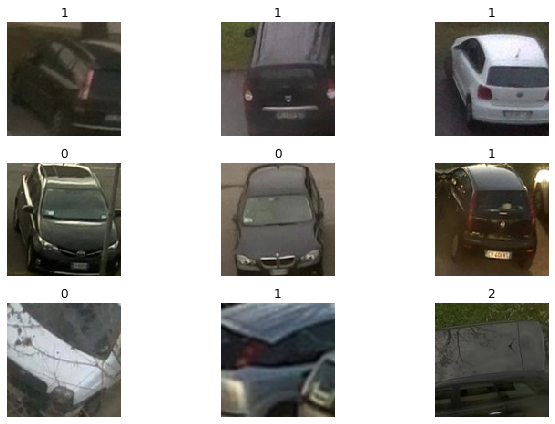

In [4]:
data.show_batch(3, figsize=(10,6))

In [5]:
learn = cnn_learner(data, models.resnet50, pretrained=True, metrics=[accuracy], callback_fns=[ShowGraph])

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


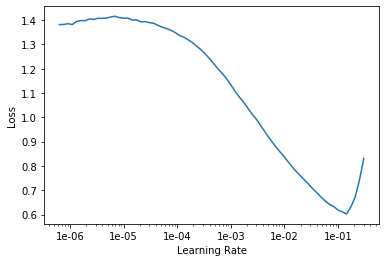

In [16]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.727573,4.197138,0.538462,00:09
1,0.558285,16.374342,0.243590,00:03
2,0.809986,81.935432,0.192308,00:03
3,1.007295,119.649124,0.358974,00:03
4,0.991981,55.320499,0.205128,00:03
5,0.903118,12.393263,0.217949,00:03
6,0.838177,3.586274,0.500000,00:03
7,0.758838,1.400685,0.782051,00:03
8,0.690067,0.529120,0.884615,00:03
9,0.626148,0.404662,0.923077,00:03


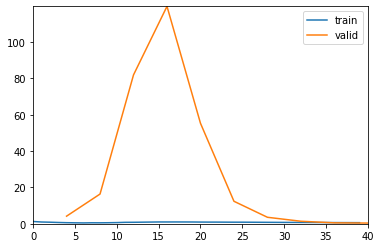

In [6]:
learn.fit_one_cycle(10, max_lr=1e-1)

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


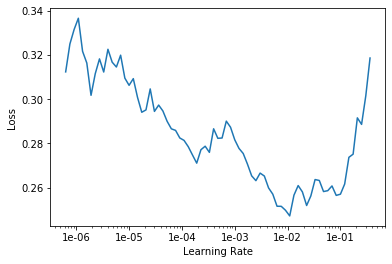

In [19]:
learn.recorder.plot()

In [20]:
learn.save('first')

epoch,train_loss,valid_loss,accuracy,time
0,0.226526,0.365279,0.923077,00:03
1,0.211653,0.339115,0.923077,00:03
2,0.222022,0.324669,0.910256,00:03
3,0.206034,0.321323,0.910256,00:03
4,0.204146,0.314347,0.910256,00:03
5,0.201635,0.306848,0.910256,00:03
6,0.214002,0.305931,0.910256,00:03
7,0.224967,0.308090,0.910256,00:03
8,0.228007,0.306554,0.910256,00:03
9,0.228781,0.305205,0.910256,00:03


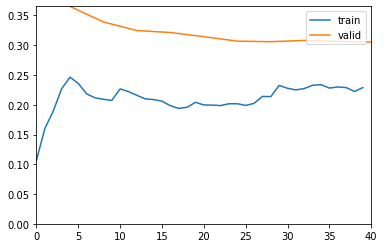

In [7]:
learn.fit_one_cycle(10, max_lr=1e-4)

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


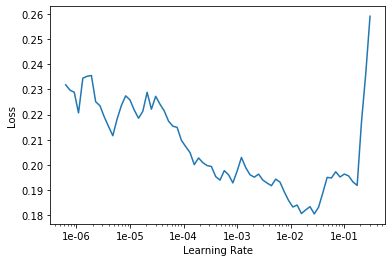

In [9]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.197585,0.305657,0.910256,00:03
1,0.175754,0.303873,0.910256,00:03
2,0.236639,0.307392,0.910256,00:03
3,0.235069,0.307922,0.910256,00:03
4,0.248005,0.304828,0.910256,00:03
5,0.246517,0.301093,0.910256,00:03
6,0.238370,0.303181,0.910256,00:03
7,0.237351,0.309006,0.910256,00:03
8,0.255085,0.312939,0.910256,00:03
9,0.249866,0.312794,0.910256,00:03


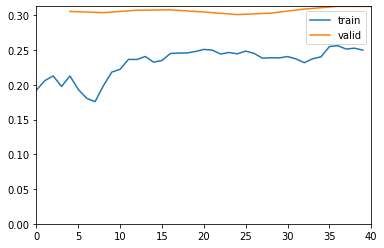

In [10]:
learn.fit_one_cycle(10, max_lr=1e-5)

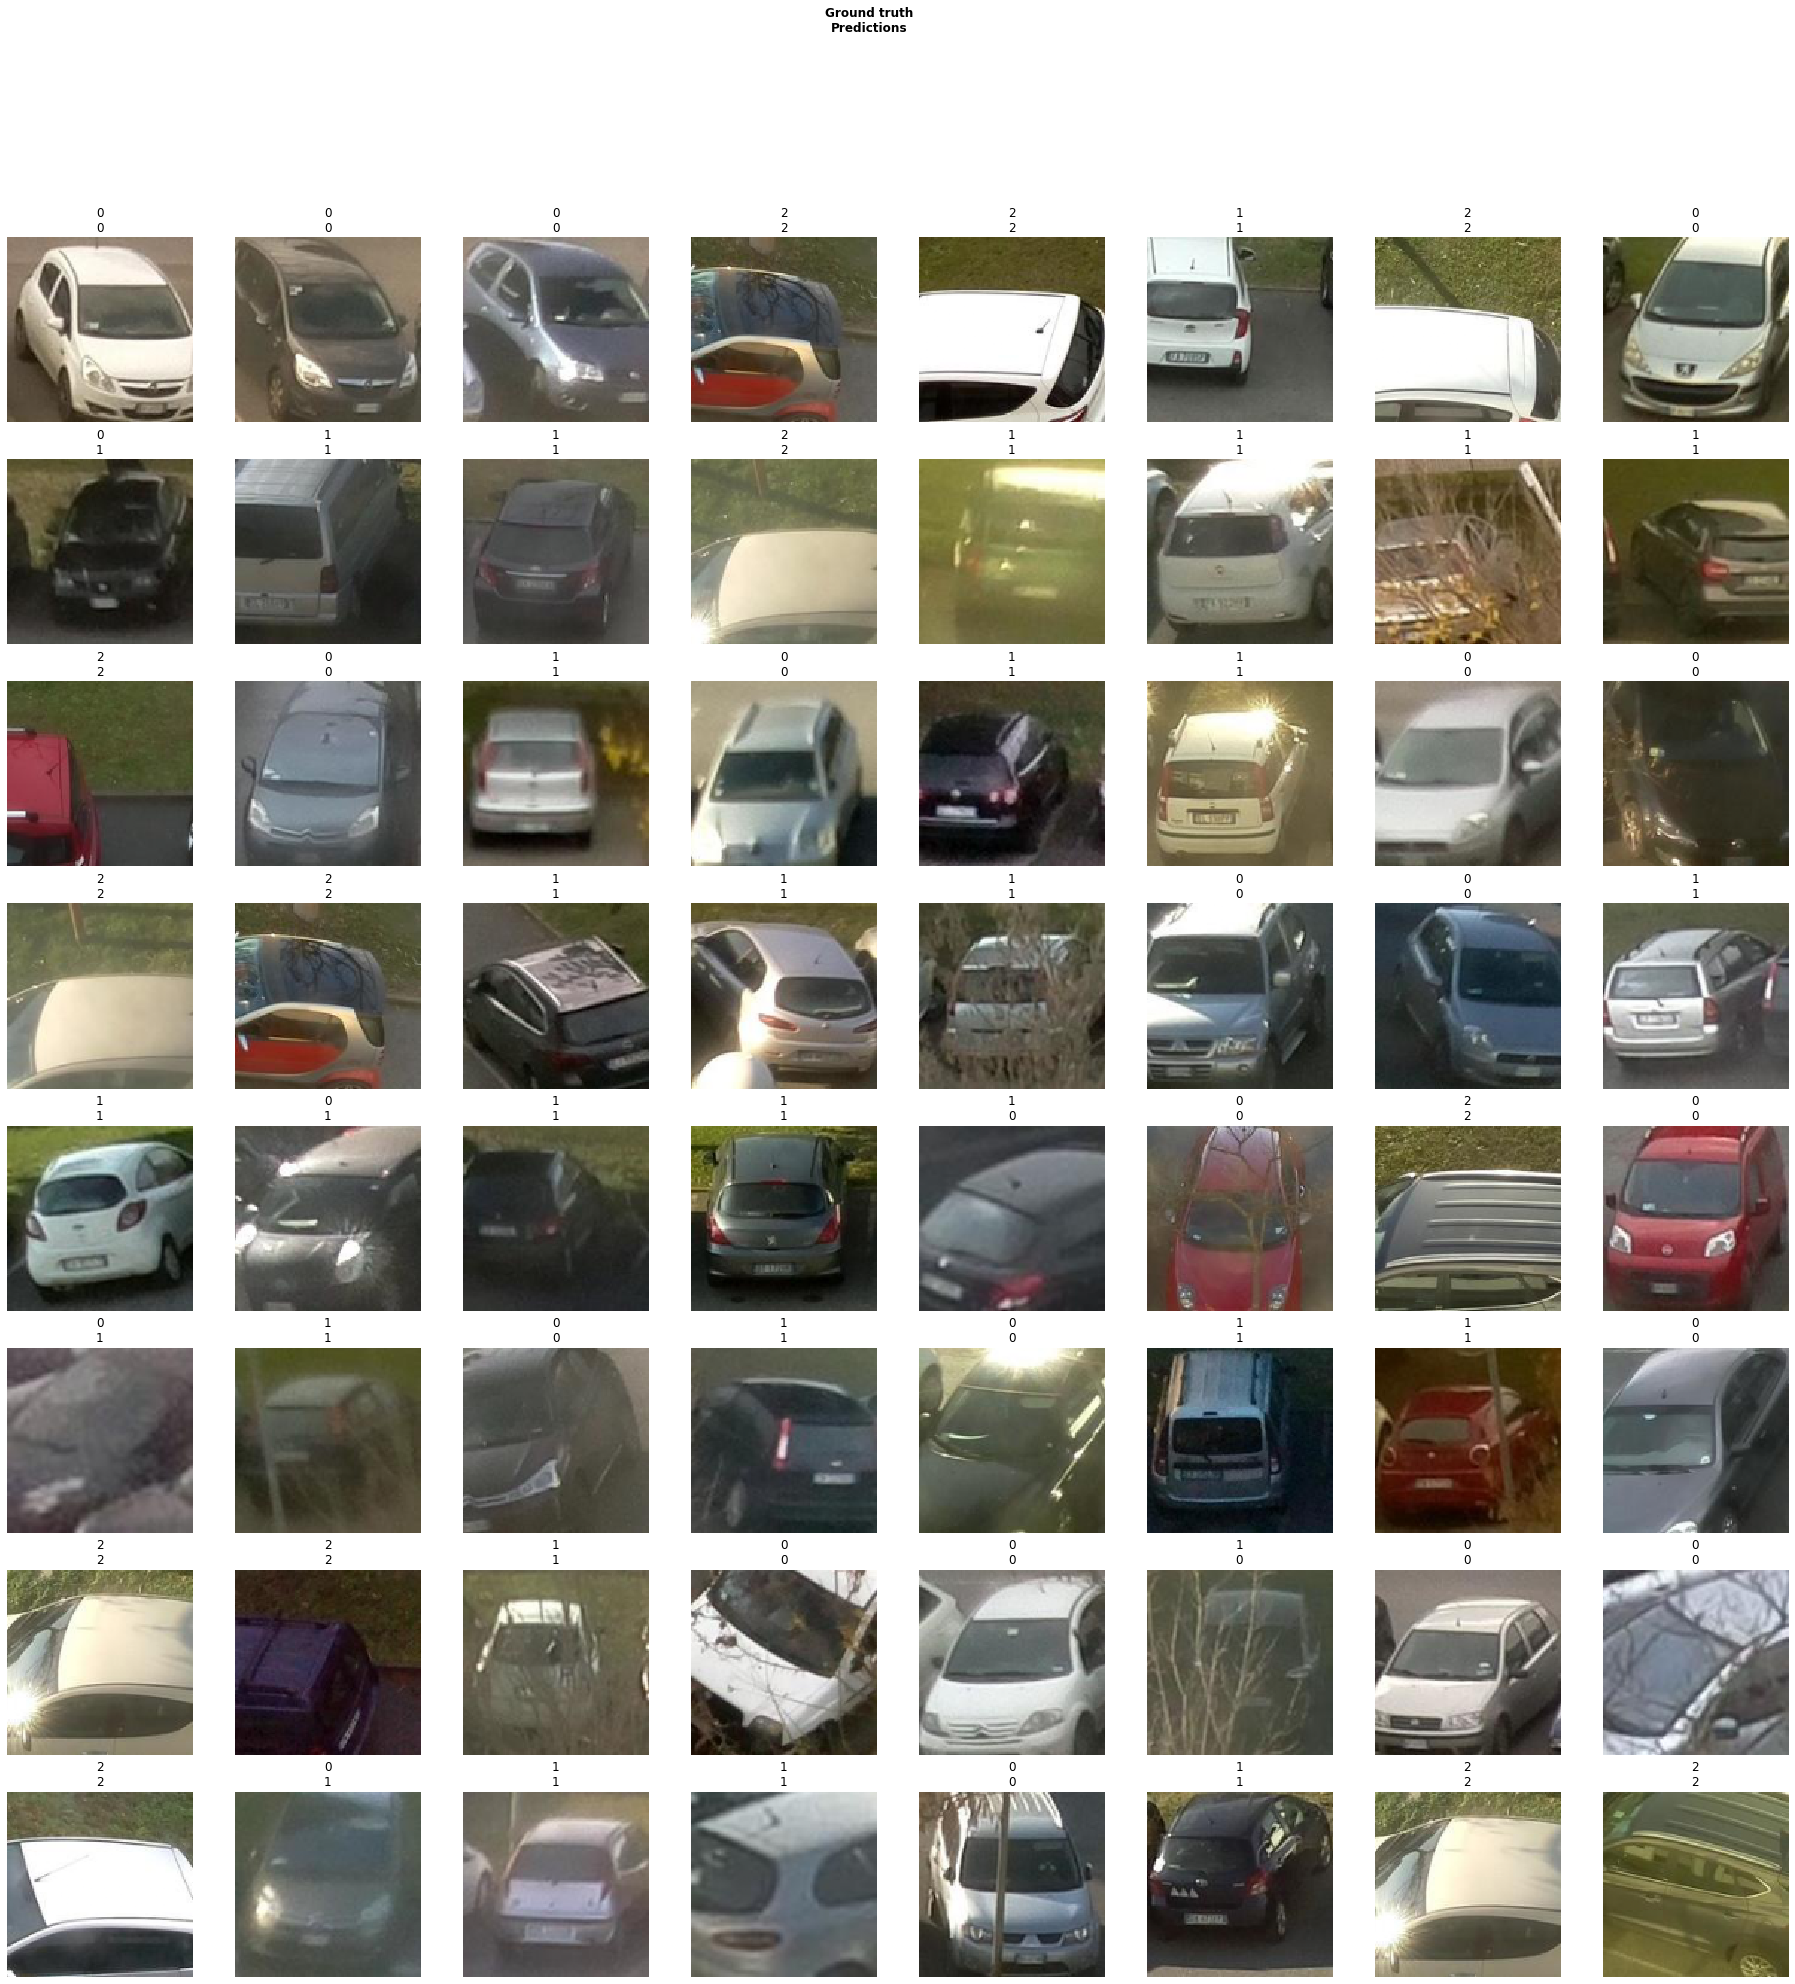

In [11]:
learn.show_results(ds_type=DatasetType.Valid, rows=10)

In [13]:
model = learn.model
model = model.to(torch.device('cpu'))
torch.save(model.state_dict(), '/home/kushaj/Desktop/Github/Final_Techgig/pose_classifier.pth')

In [14]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [1]:
import sys
sys.path.insert(0, '../scripts/')

In [2]:
from pose_classifier import get_pose_model

In [3]:
temp = get_pose_model(path='pose_classifier.pth')

In [4]:
temp

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s